In [94]:
import math
import matplotlib.pyplot as plt

In [95]:
## Outputs the amount received buying a zcb
def yield_buy(amount, time, fee, reserve_zc, reserve_u):
    a = 1 - time/fee
    x_start = math.pow(reserve_u, a)
    x_end = math.pow(reserve_u + amount, a)
    y_start = math.pow(reserve_zc, a)
    y_end = math.pow(x_start+y_start-x_end, 1/(1-time/fee))
    return (reserve_zc - y_end)

def yield_sell(amount, time, fee, reserve_zc, reserve_u):
    a = 1 - time/fee
    x_start = math.pow(reserve_u, a)
    y_end = math.pow(reserve_zc + amount, a)
    y_start = math.pow(reserve_zc, a)
    x_end = math.pow(x_start+y_start-y_end, 1/(1-time/fee))
    return (reserve_u - x_end)


In [96]:
print(yield_buy(100.0, 0.5, 0.95, 100.0, 100.0))

64.61391188030206


In [97]:
print(1/yield_buy(1.0, 0.25, 1, 123000.0, 100000.0))

0.9495650681987265


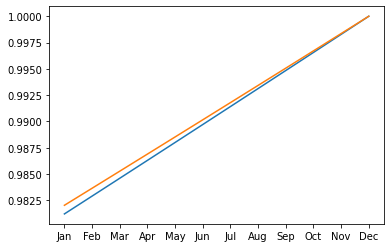

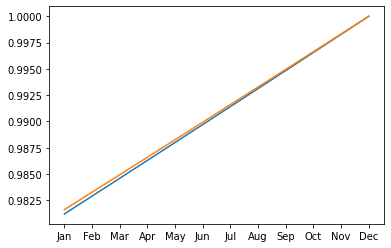

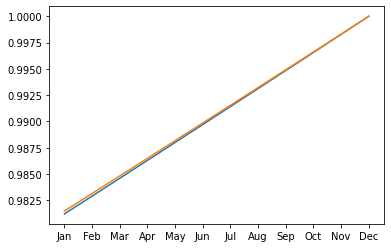

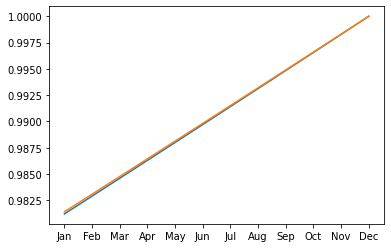

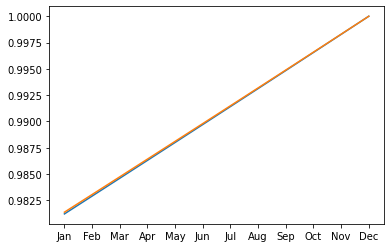

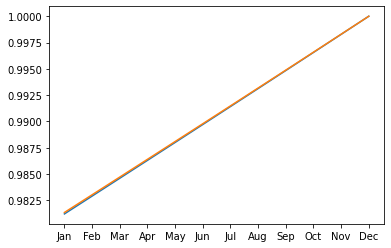

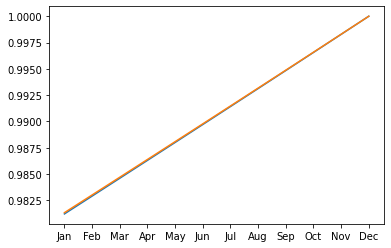

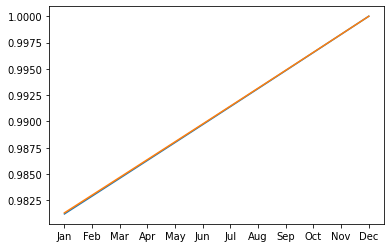

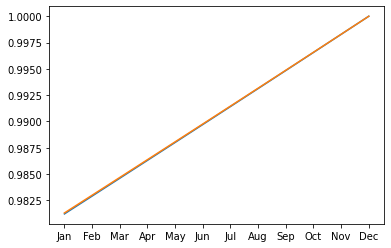

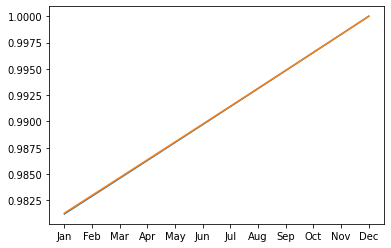

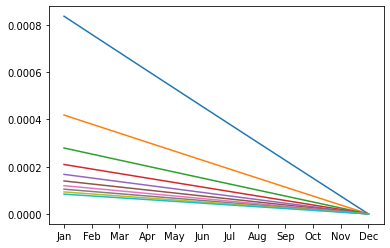

In [98]:
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul','Aug', 'Sep', 'Oct', 'Nov', 'Dec']

fee = 1

slippage = [[] for i in range(1,12)]

for j in range(1, 11):
    
    real_price = []
    price_10k = []
    fyt_reserve = j*123000.0
    dai_reserve = j*100000.0
        
    for i in range(1, 13):
        time = 0.10 - (i/12)*0.10
        refrence_price = 1/yield_buy(1.0, time, fee, fyt_reserve, dai_reserve)
        amount_dai = 1000
        amount = yield_buy(amount_dai, time, fee, fyt_reserve, dai_reserve)
        price = amount_dai/amount
        slippage[j].append((price - refrence_price)/refrence_price)
        real_price.append(refrence_price)
        price_10k.append(price)
        
    plt.plot(months, real_price)
    plt.plot(months, price_10k)
    plt.show()

for j in range(1, 11):
    plt.plot(months, slippage[j])
plt.show()

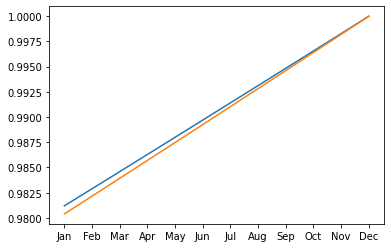

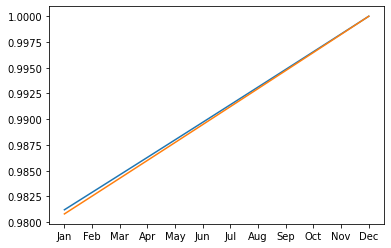

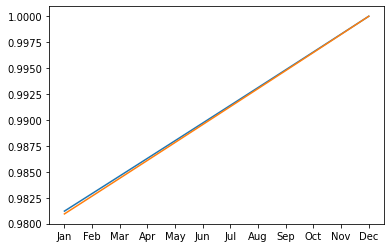

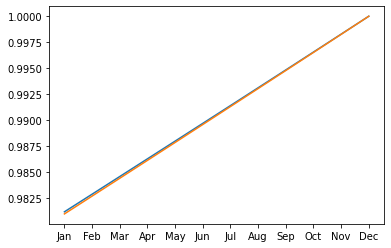

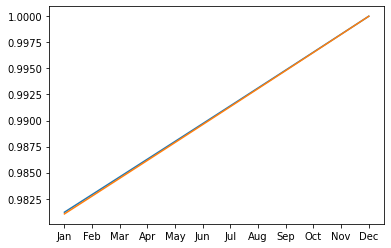

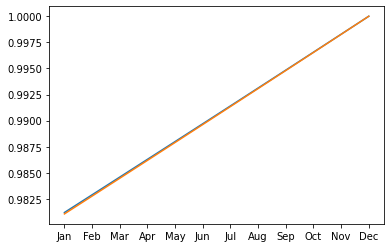

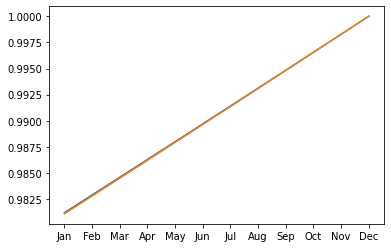

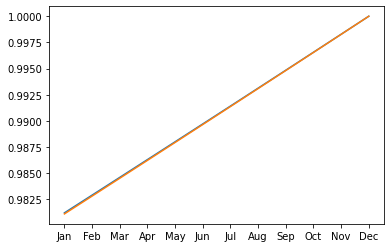

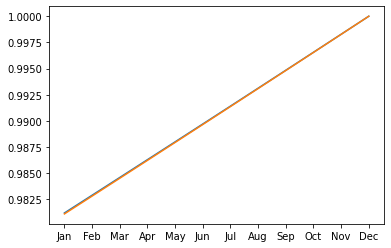

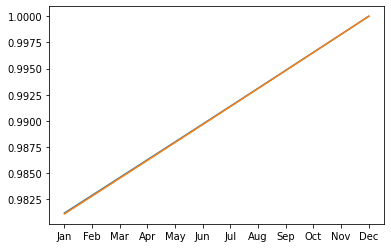

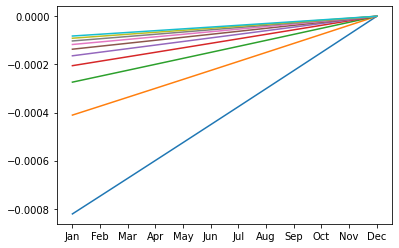

In [99]:
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul','Aug', 'Sep', 'Oct', 'Nov', 'Dec']

fee = 1

slippage = [[] for i in range(1,12)]

for j in range(1, 11):
    
    real_price = []
    price_10k = []
    fyt_reserve = j*123000.0
    dai_reserve = j*100000.0
        
    for i in range(1, 13):
        time = 0.10 - (i/12)*0.10
        refrence_price = yield_sell(1.0, time, fee, fyt_reserve, dai_reserve)
        amount_dai = 1000
        amount = yield_sell(amount_dai, time, fee, fyt_reserve, dai_reserve)
        price = amount/amount_dai
        slippage[j].append((price - refrence_price)/refrence_price)
        real_price.append(refrence_price)
        price_10k.append(price)
        
    plt.plot(months, real_price)
    plt.plot(months, price_10k)
    plt.show()

for j in range(1, 11):
    plt.plot(months, slippage[j])
plt.show()

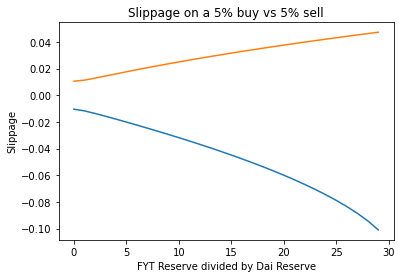

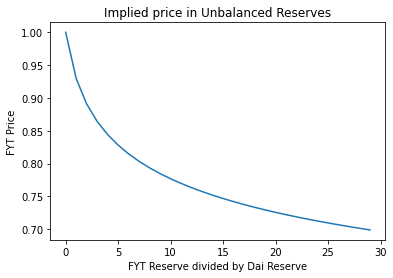

In [100]:
sell_slippage = []
buy_slippage = []
implied_price = []

time = 0.10
fee = 0.95

for j in range(1, 31):
    
    fyt_reserve = j*100000.0
    dai_reserve = 100000.0
    
    refrence_price = 1/yield_buy(1.0, time, fee, fyt_reserve, dai_reserve)
    ## trade a fixed 5% of the reserve value
    amount_dai = 0.05*(fyt_reserve*refrence_price + dai_reserve)

    ## Calculate the buy slippage
    refrence_price = 1/yield_buy(1.0, time, fee, fyt_reserve, dai_reserve)
    amount = yield_buy(amount_dai, time, fee, fyt_reserve, dai_reserve)
    price = amount_dai/amount
    buy_slippage.append((price - refrence_price)/refrence_price)

    
    ## Calculate the sell slippage
    ## The amount of fyt which is the same value as the dai
    amount_fyt = amount_dai/refrence_price
    ## Get
    refrence_price = yield_sell(1.0, time, fee, fyt_reserve, dai_reserve)
    amount = yield_sell(amount_fyt, time, fee, fyt_reserve, dai_reserve)
    price = amount/amount_fyt
    sell_slippage.append((price - refrence_price)/refrence_price)
    
    implied_price.append(refrence_price)
    
plt.plot(sell_slippage)
plt.plot(buy_slippage)
plt.title("Slippage on a 5% buy vs 5% sell")
plt.ylabel("Slippage")
plt.xlabel("FYT Reserve divided by Dai Reserve")
plt.show()

plt.plot(implied_price)
plt.title("Implied price in Unbalanced Reserves")
plt.ylabel("FYT Price")
plt.xlabel("FYT Reserve divided by Dai Reserve")
plt.show()
